# Chapter 5 Fundamentals of Machine Learning 

## 5.1 Generalization : The goal of machine leraning

The fundamental issue in machine learning is the tension between optimization
and generalization. 

+ Optimization refers to the process of adjusting a model to get the
best performance possible on the training data (the learning in machine learning),

+ Generalization refers to how well the trained model performs on data it has
never seen before

### 5.1.1 Overfitting and Underfitting 

Overfitting is particularly likely to occur when your dataset is nosiy, if it involves uncertainty. or it is includes rare featurs

+ NOISY TRAINING DATA

+ AMBIGUOUS FEATURES

+ RARE FEATURES AND SPURIOUS CORRELATIONS

 Here’s a striking example. Take MNIST. Create a new training set by concatenating
784 white noise dimensions to the existing 784 dimensions of the data, so half of the
data is now noise. 

For comparison, also create an equivalent dataset by concatenating
784 all-zeros dimensions.

Listing 5.1  Adding white noise channels or all-zeros channels to MNIST

In [2]:
from tensorflow import keras
from keras.datasets import mnist 
import numpy as np
(train_images,train_labels),_ = mnist.load_data()

train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255

train_images_with_noise_channels = np.concatenate( 
                                                   [train_images,np.random.random((len(train_images),784))],
                                                   axis=1
   )

train_images_with_zeros_channels = np.concatenate( 
                                                   [train_images,np.zeros((len(train_images),784))],
                                                   axis=1
   )

Listing 5.2 Training the same model on MNIST data with noise channels or all-zero channels

In [5]:
from keras import layers

def get_model():
    model = keras.Sequential([ 
        layers.Dense(512,activation='relu'),
        layers.Dense(10,activation='softmax')
    ])

    model.compile( optimizer = keras.optimizers.RMSprop(),
                    loss = keras.losses.SparseCategoricalCrossentropy(),
                    metrics = ['accuracy']    
                         )
    return model

In [6]:
model = get_model()
history_noise = model.fit(    
                            train_images_with_noise_channels,
                            train_labels,
                            epochs = 10,
                            batch_size = 128,
                            validation_split = 0.2
)



Epoch 1/10
375/375 [==============================] - 4s 11ms/step - loss: 0.6220 - accuracy: 0.8111 - val_loss: 0.3524 - val_accuracy: 0.8888
Epoch 2/10
375/375 [==============================] - 4s 10ms/step - loss: 0.2489 - accuracy: 0.9223 - val_loss: 0.1978 - val_accuracy: 0.9397
Epoch 3/10
375/375 [==============================] - 4s 10ms/step - loss: 0.1594 - accuracy: 0.9500 - val_loss: 0.1896 - val_accuracy: 0.9405
Epoch 4/10
375/375 [==============================] - 4s 10ms/step - loss: 0.1136 - accuracy: 0.9641 - val_loss: 0.1193 - val_accuracy: 0.9639
Epoch 5/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0823 - accuracy: 0.9735 - val_loss: 0.1276 - val_accuracy: 0.9654
Epoch 6/10
375/375 [==============================] - 4s 9ms/step - loss: 0.0598 - accuracy: 0.9812 - val_loss: 0.1154 - val_accuracy: 0.9653
Epoch 7/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0449 - accuracy: 0.9857 - val_loss: 0.1789 - val_accuracy: 0.9506


In [7]:
model = get_model()
history_zeros = model.fit(    
                            train_images_with_zeros_channels,
                            train_labels,
                            epochs = 10,
                            batch_size = 128,
                            validation_split = 0.2
)


Epoch 1/10
375/375 [==============================] - 4s 10ms/step - loss: 0.2855 - accuracy: 0.9169 - val_loss: 0.1571 - val_accuracy: 0.9532
Epoch 2/10
375/375 [==============================] - 3s 9ms/step - loss: 0.1174 - accuracy: 0.9649 - val_loss: 0.1125 - val_accuracy: 0.9680
Epoch 3/10
375/375 [==============================] - 4s 9ms/step - loss: 0.0769 - accuracy: 0.9770 - val_loss: 0.0909 - val_accuracy: 0.9726
Epoch 4/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0564 - accuracy: 0.9839 - val_loss: 0.0824 - val_accuracy: 0.9747
Epoch 5/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0411 - accuracy: 0.9879 - val_loss: 0.0842 - val_accuracy: 0.9756
Epoch 6/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0316 - accuracy: 0.9906 - val_loss: 0.0795 - val_accuracy: 0.9783
Epoch 7/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0233 - accuracy: 0.9930 - val_loss: 0.0918 - val_accuracy: 0.9739
E

Listing 5.3 Plotting a validation accuracy comparison

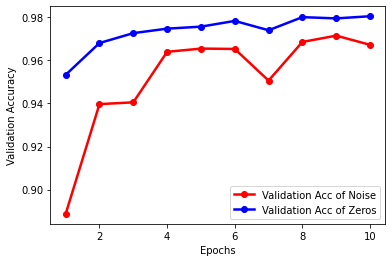

In [9]:
accuracy_noise = history_noise.history['val_accuracy']
accuracy_zeros = history_zeros.history['val_accuracy']

epochs = np.arange(1,len(accuracy_noise)+1)

from matplotlib import pyplot as plt
plt.plot(epochs,accuracy_noise,'-or',lw = 2.5,label ='Validation Acc of Noise')
plt.plot(epochs,accuracy_zeros,'-ob',lw = 2.5,label ='Validation Acc of Zeros')
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

Despite the data holding the same information in both cases, the validation accuracy
of the model trained with noise channels ends up about one percentage point lower
—purely through the influence of spurious correlations.

 Noisy features inevitably lead to overfitting. As such, in cases where you aren’t sure
whether the features you have are informative or distracting, it’s common to do feature selection before training.

### 5.1.2 The nature of generalization in deep learninng

A remarkable fact about deep learning models is that they can be trained to fit anything, as long as they have enough representational power

Try shuffling the MNIST labels and train a model on that. Even
though there is no relationship whatsoever between the inputs and the shuffled
labels, the training loss goes down just fine, even with a relatively small model. 

Naturally, the validation loss does not improve at all over time, since there is no possibility
of generalization in this setting

Listing 5.4 Fitting an MNIST model with randomly shuffled labels

In [19]:

(train_images,train_labels),_ = mnist.load_data()

train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)


In [22]:
model = keras.Sequential([
                        layers.Dense(512,activation='relu'),
                        layers.Dense(10,activation='softmax')
                            ])

model.compile(optimizer=keras.optimizers.RMSprop(),
                loss = keras.losses.SparseCategoricalCrossentropy(),
                metrics = ['accuracy']
                )

model.fit(train_images,random_train_labels,epochs=10,batch_size=128,validation_split=0.2,verbose=0)

In fact, you don’t even need to do this with MNIST data—you could just generate
white noise inputs and random labels. You could fit a model on that, too, as long as it
has enough parameters. It would just end up memorizing specific inputs, much like a
Python dictionary

1. The MANIFOLD HYPOTHESIS
    + Machine learning models only have to fit relatively simple, low-dimensional,
highly structured subspaces within their potential input space (latent manifolds).

    + Within one of these manifolds, it’s always possible to interpolate between two
 inputs, that is to say, morph one into another via a continuous path along which
 all points fall on the manifold

2. INTERPOLATION AS A SOURCE OF GENERALIZATION
    + you can make sense of the totality of the space using only a
sample of the space. You can use interpolation to fill in the blanks.

    + while deep learning achieves generalization via interpolation on a
learned approximation of the data manifold, it would be a mistake to assume that
interpolation is all there is to generalization

3. WHY DEEP LEARNING WORKS?
    + A deep learning model is basically a very high-dimensional curve—a curve that is
smooth and continuous (with additional constraints on its structure, originating from
model architecture priors), since it needs to be differentiable.

    + The curve involves enough parameters that it could fit anything—indeed, if you let
your model train for long enough, it will effectively end up purely memorizing its
training data and won’t generalize at al

    + Deep learning models tend to be structured in a way that mirrors the “shape” of
the information in their training data (via architecture priors). More generally, deep neural networks structure their learned representations in a hierarchical and modular way, which echoes the way natural data is organized.

## 5.2 Evaluating Machine Learning Models

### 5.2.1 Training, validation and test sets

The central to this phenomenon is the notion of information leaks

#### Simple Holdout validation

Listing 5.5 Holdout validation (note that labels are omitted for simplicity)

In [23]:
def hold_out_validation(data):
    num_validation_samples = 10000
    np.random.shuffle(data)
    validation_data =data[:num_validation_samples]
    training_data =data[num_validation_samples:]
    model = get_model()
    model.fit(training_data,...)
    validation_score = model.evaluate(validation_data,...)

The Drawback : If little data is available, then your validation and test sets may contain too few samples to be statistically representative of the data at hand.

#### K-FOLD VALIDATION

With this approach, you split your data into K partitions of equal size. For each partition i, train a model on the remaining K - 1 partitions, and evaluate it on partition i.
Your final score is then the averages of the K scores obtained

Listing 5.6 K-fold cross-validation (note that labels are omitted for simplicity)

In [24]:
def K_Fold_CV(data):
    k = 3
    num_validation_samples = len(data) // k
    np.random.shuffle(data)
    validation_scores = [] 
    for fold in range(k):
        validation_data = data[num_validation_samples * fold: 
        num_validation_samples * (fold + 1)] 
        training_data = np.concatenate( 
        data[:num_validation_samples * fold], 
        data[num_validation_samples * (fold + 1):]) 
    model = get_model() 
    model.fit(training_data, ...)
    validation_score = model.evaluate(validation_data, ...)
    validation_scores.append(validation_score)
    validation_score = np.average(validation_scores) 
    model = get_model() 
    model.fit(data, ...) 
    test_score = model.evaluate(test_data, ...)

Note that you end up training and
evaluating P * K models (where P is the number of iterations you use), which can be
very expensive

### 5.2.2 Beating a common-sense baseline

+  Training a deep learning model is a bit like pressing a button that launches a
rocket in a parallel world. You can’t hear it or see it. You can’t observe the manifold
learning process

+  It’s particularly important to be able to tell whether you’re getting off the ground
at all.  If you cross that threshold, you’ll know you’re
doing something right: your model is actually using the information in the input data
to make predictions that generalize, and you can keep going.

+  Having a common-sense baseline you can refer to is essential when you’re getting
started on a problem no one has solved before.

### 5.2.3 Things to keep in mind about model evaluation

1. Data representativeness—You want both your training set and test set to be representative of the data at hand.


2. The arrow of time—If you’re trying to predict the future given the past , you should not randomly shuffle your data before splitting it, because doing so will create a temporal leak: your model will effectively be trained on data from the future


3. Redundancy in your data—If some data points in your data appear twice (fairly
common with real-world data), then shuffling the data and splitting it into a
training set and a validation set will result in redundancy between the training
and validation sets

## 5.3 Imporving model fit 

Three common problems : 
1. Training doesn’t get started: your training loss doesn’t go down over time

2. Training gets started just fine, but your model doesn’t meaningfully generalize:
you can’t beat the common-sense baseline you set.

3. Training and validation loss both go down over time, and you can beat your
baseline, but you don’t seem to be able to overfit, which indicates you’re still
underfitting.

### 5.3.1 Turning key gradient descent parameters

Sometimes training doesn’t get started, or it stalls too early. Your loss is stuck. This is
always something you can overcome: remember that you can fit a model to random
data. Even if nothing about your problem makes sense, you should still be able to train
something—if only by memorizing the training data

Listing 5.7 Training an MNIST model with an incorrectly high learning rate

In [25]:
(train_images,train_labels),_ = mnist.load_data()
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype("float32")/255

model = keras.Sequential([ layers.Dense(512,activation='relu'),
                            layers.Dense(10,activation='softmax')
                             ])

model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1.0),
            loss = keras.losses.SparseCategoricalCrossentropy(),
            metrics = ['accuracy']
                 )

model.fit(train_images,train_labels,epochs=10,batch_size=128,validation_split=0.2,verbose=1)

Epoch 1/10
375/375 [==============================] - 3s 7ms/step - loss: 694.8312 - accuracy: 0.3561 - val_loss: 2.3002 - val_accuracy: 0.1768
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 3.9634 - accuracy: 0.2515 - val_loss: 2.0589 - val_accuracy: 0.3262
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 4.2352 - accuracy: 0.2515 - val_loss: 2.9600 - val_accuracy: 0.2490
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 3.1011 - accuracy: 0.2596 - val_loss: 2.3840 - val_accuracy: 0.2960
Epoch 5/10
375/375 [==============================] - 3s 7ms/step - loss: 2.7378 - accuracy: 0.2899 - val_loss: 2.8454 - val_accuracy: 0.2708
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 2.6944 - accuracy: 0.2710 - val_loss: 2.8771 - val_accuracy: 0.2901
Epoch 7/10
375/375 [==============================] - 3s 7ms/step - loss: 2.7062 - accuracy: 0.2611 - val_loss: 2.9651 - val_accuracy: 0.2514
Epoc

Listing 5.8 The same model with a more appropriate learning rate

In [26]:
(train_images,train_labels),_ = mnist.load_data()
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype("float32")/255

model = keras.Sequential([ layers.Dense(512,activation='relu'),
                            layers.Dense(10,activation='softmax')
                             ])

model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-2),
            loss = keras.losses.SparseCategoricalCrossentropy(),
            metrics = ['accuracy']
                 )

model.fit(train_images,train_labels,epochs=10,batch_size=128,validation_split=0.2,verbose=1)

Epoch 1/10
375/375 [==============================] - 3s 7ms/step - loss: 0.4073 - accuracy: 0.9075 - val_loss: 0.1717 - val_accuracy: 0.9531
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1421 - accuracy: 0.9630 - val_loss: 0.1472 - val_accuracy: 0.9665
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1157 - accuracy: 0.9723 - val_loss: 0.1764 - val_accuracy: 0.9653
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1055 - accuracy: 0.9766 - val_loss: 0.2231 - val_accuracy: 0.9618
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0836 - accuracy: 0.9819 - val_loss: 0.2168 - val_accuracy: 0.9659
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0822 - accuracy: 0.9837 - val_loss: 0.2316 - val_accuracy: 0.9693
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0665 - accuracy: 0.9862 - val_loss: 0.2066 - val_accuracy: 0.9749
Epoch 

+ Lowering or increasing the learning rate. A learning rate that is too high may
lead to updates that vastly overshoot a proper fit, like in the preceding example,
and a learning rate that is too low may make training so slow that it appears
to stall.


+ Increasing the batch size. A batch with more samples will lead to gradients that
are more informative and less noisy (lower variance).

### 5.3.2 Leveraging better architecture priors

1.  First, it may be that the input data you’re using simply doesn’t contain sufficient
information to predict your targets: the problem as formulated is not solvable

2.  It may also be that the kind of model you’re using is not suited for the problem at
hand.

### 5.3.3 Increasing model capacity 

If you manage to get to a model that fits, where validation metrics are going down,
and that seems to achieve at least some level of generalization power, congratulations:
you’re almost there. Next, you need to get your model to start overfitting.

Listing 5.9 A simple logistic regression on MNIST

In [28]:
model = keras.Sequential([layers.Dense(10,activation='softmax')])
model.compile(optimizer=keras.optimizers.RMSprop(),
            loss= keras.losses.SparseCategoricalCrossentropy(),
            metrics = ['accuracy']
                )
history_small_model = model.fit(train_images,train_labels,batch_size=128,epochs=20,validation_split=0.2,verbose=0)




In [29]:
model = keras.Sequential([
                            layers.Dense(96,activation='relu'),
                            layers.Dense(96,activation='relu'),
                            layers.Dense(10,activation='softmax')
                            
                            ])

model.compile(optimizer=keras.optimizers.RMSprop(),
            loss= keras.losses.SparseCategoricalCrossentropy(),
            metrics = ['accuracy']
                )
history_large_model = model.fit(train_images,train_labels,batch_size=512,epochs=20,validation_split=0.2,verbose=0)




In [30]:
val_loss_small = history_small_model.history['val_loss']
epochs_small = np.arange(1,len(val_loss_small)+1)
val_loss_large = history_large_model.history['val_loss']
epochs_large = np.arange(1,len(val_loss_large)+1)

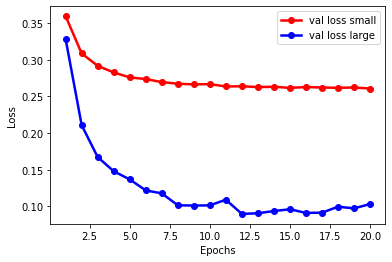

In [33]:
plt.plot(epochs_small,val_loss_small,'-or',lw=2.5,label='val loss small')
plt.plot(epochs_large,val_loss_large,'-ob',lw=2.5,label='val loss large')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


## 5,4 Improving generalization

### 5.4.1 Dataset Curation

1. Make sure you have enough data. Remember that you need a dense sampling of
the input-cross-output space. More data will yield a better model. Sometimes,
problems that seem impossible at first become solvable with a larger dataset.

2. Minimize labeling errors—visualize your inputs to check for anomalies, and
proofread your labels.

3. Clean your data and deal with missing values

4. If you have many features and you aren’t sure which ones are actually useful, do
feature selection.

### 5.4.2 Feature Engineering

+ Good features still allow you to solve problems more elegantly while using fewer
resources. For instance, it would be ridiculous to solve the problem of reading a
clock face using a convolutional neural network

+ Good features let you solve a problem with far less data. The ability of deep
learning models to learn features on their own relies on having lots of training
data available; if you have only a few samples, the information value in their features becomes critical.

### 5.4.3 Using early stopping

This overparameterization is not an issue, because you never fully fit a
deep learning model

Finding the exact point during training where you’ve reached the most generalizable fit—the exact boundary between an underfit curve and an overfit curve—is one
of the most effective things you can do to improve generalization.

Naturally, you could just save your model at the end of each
epoch, and once you’ve found the best epoch, reuse the closest saved model you have.


In Keras, it’s typical to do this with an EarlyStopping callback, which will interrupt
training as soon as validation metrics have stopped improving, while remembering the
best known model state.

### 5.4.4 Regularizing your model

Regularization techniques are a set of best practices that actively impede the model’s ability to fit perfectly to the training data, with the goal of making the model perform better during validation.

#### Reducing the network size

You must evaluate an array of different architectures (on
your validation set, not on your test set, of course) in order to find the correct model
size for your data. 

The general workflow for finding an appropriate model size is to start
with relatively few layers and parameters, and increase the size of the layers or add new
layers until you see diminishing returns with regard to validation loss

Listing 5.10 Original model

In [36]:
from keras.datasets import imdb
(train_data,train_labels),_ = imdb.load_data(num_words=10000)

def vectorize_sequence(sequnces,dimension = 10000):
    results = np.zeros((len(sequnces),dimension ))

    for i , sequnce in enumerate(sequnces):
        for j in sequnce:
            results[i,j] = 1
    
    return results

train_data =vectorize_sequence(train_data)


In [37]:
model = keras.Sequential([ 
                        layers.Dense(16,activation='relu'),
                        layers.Dense(16,activation='relu'),
                        layers.Dense(1,activation='sigmoid')
                        ])

model.compile(optimizer=keras.optimizers.RMSprop(),
               loss = keras.losses.BinaryCrossentropy(),
                metrics = ['accuracy']
                )

history_original = model.fit(train_data,train_labels,epochs=20,batch_size=512,validation_split=0.4,verbose=0)

Listing 5.11 Version of the model with lower capacity

In [38]:
model = keras.Sequential([ 
                        layers.Dense(4,activation='relu'),
                        layers.Dense(4,activation='relu'),
                        layers.Dense(1,activation='sigmoid')
                        ])

model.compile(optimizer=keras.optimizers.RMSprop(),
               loss = keras.losses.BinaryCrossentropy(),
                metrics = ['accuracy']
                )

history_small_model = model.fit(train_data,train_labels,epochs=20,batch_size=512,validation_split=0.4,verbose=0)

In [39]:
val_loss_small = history_small_model.history['val_loss']
epochs_small = np.arange(1,len(val_loss_small)+1)
val_loss_original = history_original.history['val_loss']
epochs_original = np.arange(1,len(val_loss_original)+1)

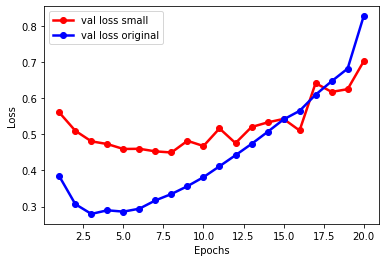

In [40]:
plt.plot(epochs_small,val_loss_small,'-or',lw=2.5,label='val loss small')
plt.plot(epochs_original,val_loss_original,'-ob',lw=2.5,label='val loss original')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


As you can see, the smaller model starts overfitting later than the reference model
(after six epochs rather than four), and its performance degrades more slowly once it
starts overfitting.


Now, let’s add to our benchmark a model that has much more capacity—far more
than the problem warrants.

there can definitely be such
a thing as too much memorization capacity. 

You’ll know your model is too large if it
starts overfitting right away and if its validation loss curve looks choppy with highvariance (although choppy validation metrics could also be a symptom of using an
unreliable validation process, such as a validation split that’s too small).

Listing 5.12 Version of the model with higher capacity

In [41]:
model = keras.Sequential([ 
                        layers.Dense(512,activation='relu'),
                        layers.Dense(512,activation='relu'),
                        layers.Dense(1,activation='sigmoid')
                        ])

model.compile(optimizer=keras.optimizers.RMSprop(),
               loss = keras.losses.BinaryCrossentropy(),
                metrics = ['accuracy']
                )

history_large_model = model.fit(train_data,train_labels,epochs=20,batch_size=512,validation_split=0.4,verbose=0)

In [42]:
val_loss_large = history_large_model.history['val_loss']
epochs_large = np.arange(1,len(val_loss_large)+1)

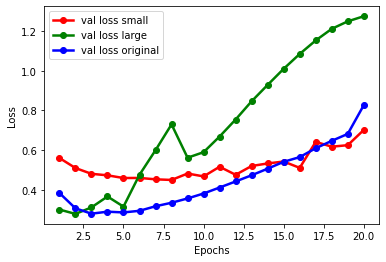

In [44]:
plt.plot(epochs_small,val_loss_small,'-or',lw=2.5,label='val loss small')
plt.plot(epochs_large,val_loss_large,'-og',lw=2.5,label='val loss large')
plt.plot(epochs_original,val_loss_original,'-ob',lw=2.5,label='val loss original')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


#### Adding weight regularization

Weight Regularization

A simple model in this context is a model where the distribution of parameter values
has less entropy (or a model with fewer parameters, as you saw in the previous section). 


Thus, a common way to mitigate overfitting is to put constraints on the complexity of a model by forcing its weights to take only small values, which makes the distribution of weight values more regular. 

1.  L1 regularization—The cost added is proportional to the absolute value of the
weight coefficients (the L1 norm of the weights).

2.  L2 regularization—The cost added is proportional to the square of the value of the
weight coefficients (the L2 norm of the weights). L2 regularization is also called
weight decay in the context of neural networks. Don’t let the different name confuse you: weight decay is mathematically the same as L2 regularization.

Listing 5.13 Adding L2 weight regularization to the model

In the preceding listing, l2(0.002) means every coefficient in the weight matrix of
the layer will add 0.002 * weight_coefficient_value ** 2 to the total loss of the
model. 


Note that because this penalty is only added at training time, the loss for this
model will be much higher at training than at test time.

In [45]:
from keras import regularizers

model = keras.Sequential([ 
                        layers.Dense(16,activation='relu',kernel_regularizer=regularizers.l2(0.002)),
                        layers.Dense(16,activation='relu',kernel_regularizer=regularizers.l2(0.002)),
                        layers.Dense(1,activation='sigmoid')
                        ])

model.compile(optimizer=keras.optimizers.RMSprop(),
               loss = keras.losses.BinaryCrossentropy(),
                metrics = ['accuracy']
                )

history_l2_reg = model.fit(train_data,train_labels,epochs=20,batch_size=512,validation_split=0.4,verbose=0)

val_loss_l2_reg = history_l2_reg.history['val_loss']
epochs_l2_reg = np.arange(1,len(val_loss_l2_reg)+1)

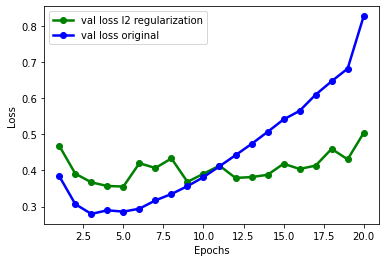

In [46]:
plt.plot(epochs_l2_reg,val_loss_l2_reg,'-og',lw=2.5,label='val loss l2 regularization')
plt.plot(epochs_original,val_loss_original,'-ob',lw=2.5,label='val loss original')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


Listing 5.14 Different weight regularizers available in Keras

In [49]:
from keras import regularizers

model = keras.Sequential([ 
                        layers.Dense(16,activation='relu',kernel_regularizer=regularizers.l2(0.001)),
                        layers.Dense(16,activation='relu',kernel_regularizer=regularizers.l2(0.001)),
                        layers.Dense(1,activation='sigmoid')
                        ])

model.compile(optimizer=keras.optimizers.RMSprop(),
               loss = keras.losses.BinaryCrossentropy(),
                metrics = ['accuracy']
                )

history_l2_reg_1 = model.fit(train_data,train_labels,epochs=20,batch_size=512,validation_split=0.4,verbose=0)

val_loss_l2_reg_1 = history_l2_reg_1.history['val_loss']
epochs_l2_reg_1 = np.arange(1,len(val_loss_l2_reg_1)+1)

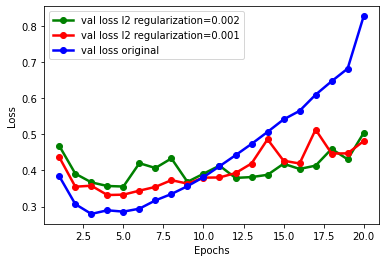

In [50]:
plt.plot(epochs_l2_reg,val_loss_l2_reg,'-og',lw=2.5,label='val loss l2 regularization=0.002')
plt.plot(epochs_l2_reg_1,val_loss_l2_reg_1,'-or',lw=2.5,label='val loss l2 regularization=0.001')
plt.plot(epochs_original,val_loss_original,'-ob',lw=2.5,label='val loss original')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
